# Lotomania

## Informações

### Como jogar
A Lotomania é fácil de jogar e de ganhar: basta escolher 50 números e então concorrer a prêmios para acertos de 20, 19, 18, 17, 16, 15 ou nenhum número.
Além da opção de marcar no volante, você ainda pode marcar menos que 50 números e deixar que o sistema complete o jogo para você; não marcar nada e deixar que o sistema escolha todos os números na Surpresinha e/ou concorrer com a mesma aposta por 2, 4 ou 8 concursos consecutivos com a Teimosinha. Outra opção é efetuar uma nova aposta com o sistema selecionando os outros 50 números não registrados no jogo original, através da Aposta-Espelho.

### Apostas

O preço da aposta é único e custa apenas R\$ 1,50.

### Sorteios

Os sorteios são realizados às terças-feiras e às sextas-feiras, às 20h.

### Premiação

O prêmio bruto corresponde a 45,3\% da arrecadação, já computado o adicional destinado ao Ministério do Esporte. Dessa porcentagem são distribuídos:
- 45\% entre os acertadores dos 20 números sorteados - 1ª faixa;
- 16\% entre os acertadores de 19 dos 20 números sorteados - 2ª faixa;
- 10\% entre os acertadores de 18 dos 20 números sorteados - 3ª faixa;
- 7\% entre os acertadores de 17 dos 20 números sorteados - 4ª faixa;
- 7\% entre os acertadores de 16 dos 20 números sorteados - 5ª faixa;
- 7\% entre os acertadores de 15 dos 20 números sorteados - 6ª faixa;
- 8\% entre os acertadores de nenhum dos 20 números sorteados - 7ª faixa;

### Recebimento de prêmios

Você pode receber seu prêmio em qualquer casa lotérica credenciada ou nas agências da Caixa. Caso o prêmio líquido seja superior a R\$ 1.332,78 (bruto de R\$ 1.903,98) o pagamento pode ser realizado somente nas agências da Caixa. Valores iguais ou acima de R\$ 10.000,00 são pagos após 2 dias de sua apresentação na agência da Caixa.

### Acumulação

Não existindo aposta premiada na 7ª faixa (0 acerto), o prêmio acumula para o concurso subsequente, na 1ª faixa de premiação (20 acertos). Nas demais faixas, o prêmio acumula na respectiva faixa de premiação.

### Tabela de preços

|Aposta única|Valor em R\$|
|::|::|
|50 números|1,50|

###  Probabilidade

|Faixas|Probabilidade|
|::|::|
|20 números|1/11.372.635|
|19 números|1/352.551|
|18 números|1/24.235|
|17 números|1/2.776|
|16 números|1/472|
|15 números|1/112|
|00 números|1/11.372.635|


In [1]:
from matplotlib import pyplot as plt

# local
from lottery.strategy import LoteryStrategyBase

import pandas as pd
import numpy as np
import random

## Data Cleaning

In [2]:
data_path = 'data/lotomania.txt'
df = pd.read_csv(
    data_path, names=['id', 'date'] + list(range(20))
).drop_duplicates().sort_values('id').reset_index(drop=True)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835 entries, 0 to 1834
Data columns (total 22 columns):
id      1835 non-null int64
date    1835 non-null object
0       1835 non-null int64
1       1835 non-null int64
2       1835 non-null int64
3       1835 non-null int64
4       1835 non-null int64
5       1835 non-null int64
6       1835 non-null int64
7       1835 non-null int64
8       1835 non-null int64
9       1835 non-null int64
10      1835 non-null int64
11      1835 non-null int64
12      1835 non-null int64
13      1835 non-null int64
14      1835 non-null int64
15      1835 non-null int64
16      1835 non-null int64
17      1835 non-null int64
18      1835 non-null int64
19      1835 non-null int64
dtypes: int64(21), object(1)
memory usage: 315.5+ KB


In [3]:
df.tail()

,id,date,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
1830,1831,12-01-2018,1,3,5,6,9,11,26,29,...,53,54,62,63,66,70,79,80,87,91
1831,1832,16-01-2018,2,20,25,36,39,47,49,50,...,70,75,76,77,79,80,83,90,93,95
1832,1833,19-01-2018,1,5,7,15,16,20,25,36,...,57,58,76,77,78,80,82,85,88,93
1833,1834,23-01-2018,1,6,22,23,24,35,36,37,...,55,58,61,68,71,77,79,81,93,94
1834,1835,26-01-2018,1,4,9,15,17,18,20,27,...,62,67,68,70,74,79,84,93,94,99


## Strategies

In [4]:
class HighFrequencyStrategy(LoteryStrategyBase):
    """
    
    """
    def pick_numbers(self, df_train: pd.DataFrame=None) -> [int]:
        """
        Pick number for the next game
        
        :param df_train: dataframe with training data
        :return: list of numbers
        """
        if df_train is None:
            df_train = self.data[self.k_results]
            
        values_train = pd.Series(df_train.values.flatten())
        se_choice = values_train.value_counts()[:self.n_choices]
        
        return sorted(se_choice.index.values.tolist())

In [5]:
class LowFrequencyStrategy(LoteryStrategyBase):
    """
    
    """
    def pick_numbers(self, df_train: pd.DataFrame=None) -> [int]:
        """
        Pick number for the next game
        
        :param df_train: dataframe with training data
        :return: list of numbers
        """
        if df_train is None:
            df_train = self.data[self.k_results]
        
        values_train = pd.Series(df_train.values.flatten())
        se_choice = values_train.value_counts()[-self.n_choices:]
        
        return sorted(se_choice.index.values.tolist())

In [6]:
class MedianFrequencyStrategy(LoteryStrategyBase):
    def pick_numbers(self, df_train: pd.DataFrame=None) -> [int]:
        """
        Pick number for the next game
        
        :param df_train: dataframe with training data
        :return: list of numbers
        """
        if df_train is None:
            df_train = self.data[self.k_results]

        values_train = pd.Series(df_train.values.flatten())
        se_choice = values_train.value_counts()
        i = int((se_choice.size - self.n_choices)/2)
        se_choice = se_choice[i:i+self.n_choices]
        
        return sorted(se_choice.index.values.tolist())

In [7]:
class RandomStrategy(LoteryStrategyBase):
    def pick_numbers(self, df_train: pd.DataFrame=None) -> [int]:
        """
        Pick number for the next game
        
        :param df_train: dataframe with training data
        :return: list of numbers
        """
        return sorted(
            random.sample(range(self.vmin, self.vmax), self.n_choices)
        )

In [8]:
class PickedMatchedLast3Strategy(LoteryStrategyBase):
    def pick_numbers(self, df_train: pd.DataFrame=None) -> [int]:
        """
        Pick number for the next game
        
        :param df_train: dataframe with training data
        :return: list of numbers
        """
        if df_train is None:
            df_train = self.data[self.k_results]

        
        se_last = (
            df_train.tail(1).values.flatten().tolist(),
            df_train.tail(2).head(1).values.flatten().tolist(),
            df_train.tail(3).head(1).values.flatten().tolist()
        )

        # number frequency
        se_counts = pd.Series(df_train.values.flatten()).value_counts()
        se_counts.name = 'counts'
        df_counts = pd.DataFrame(se_counts).reset_index().rename(
            columns={'index': 'num'}
        )

        choice = se_counts[:50].index.tolist()

        # comparison between last 3 results
        matched = (
            set(se_last[0]) & set(se_last[1]),
            set(se_last[1]) & set(se_last[2]),
            set(se_last[0]) & set(se_last[2])
        )

        matched_joined = matched[0] | matched[1] | matched[2]

        choice = sorted(se_counts.index.tolist())

        # remove the matched number from the las 3 results
        for i in matched_joined:
            choice.pop(choice.index(i))

        return choice[-50:]
    

In [9]:
class MixSimpleStrategy(LoteryStrategyBase):
    strategies = None  # list
    
    def __init__(self, *args, strategies: list, **kwargs):
        # should be informed more than 1 strategy class
        assert len(strategies) > 1
        
        self.strategies = [
            s(*args, **kwargs) for s in strategies
        ]
        
        super().__init__(*args, **kwargs)
        
    def pick_numbers(self, df_train: pd.DataFrame=None) -> [int]:
        """
        Pick number for the next game
        
        :param df_train: dataframe with training data
        :return: list of numbers
        """
        results = [
            s.pick_numbers(df_train) for s in self.strategies
        ]
        
        final_numbers_raw = None
        
        for i in range(len(results)-1):
            for j in range(i, len(results)):
                nums = set(results[i]) & set(results[j])
                if final_numbers_raw is None:
                    final_numbers_raw = nums
                else:
                    final_numbers_raw = final_numbers_raw | nums
        
        final_numbers = list(final_numbers_raw)[:self.n_choices]
        
        # assert number of numbers picked
        assert len(final_numbers) == self.n_choices
        
        return final_numbers

In [10]:
lotomania_settings = dict(
    n_picked=20,
    n_choices=50,
    vmin=0,
    vmax=99,
    n_train=10,
    hits_to_win=(0, 15, 16, 17, 18, 19, 20)
)
n_samples = 1000
next_game_numbers = []

### Test High Frequency Strategy

Win results:  8/990 (0.8080808080808081 %)
Next choice: [0, 1, 2, 3, 4, 6, 8, 9, 15, 16, 17, 19, 21, 26, 29, 31, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 53, 54, 55, 58, 60, 63, 66, 67, 70, 73, 74, 76, 77, 78, 79, 80, 82, 85, 87, 92, 93]
          results
count  990.000000
mean     9.966667
std      2.030082
min      4.000000
25%      9.000000
50%     10.000000
75%     11.000000
max     16.000000


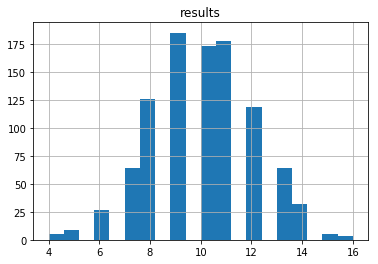

In [11]:
model = HighFrequencyStrategy(data=df.tail(n_samples), **lotomania_settings)

print('Win results: ', model.win_results())
print('Next choice:', model.pick_numbers())

model.stats()
model.plot_stats()

### Test Low Frequency Strategy

Win results:  14/990 (1.4141414141414141 %)
Next choice: [5, 7, 10, 11, 12, 13, 14, 18, 20, 22, 23, 24, 25, 27, 28, 30, 32, 33, 34, 42, 46, 50, 51, 52, 56, 57, 59, 61, 62, 64, 65, 68, 69, 71, 72, 75, 81, 83, 84, 86, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99]
          results
count  990.000000
mean     9.902020
std      2.083567
min      3.000000
25%      8.000000
50%     10.000000
75%     11.000000
max     17.000000


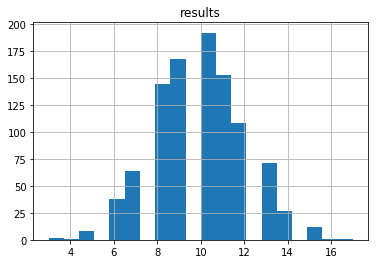

In [12]:
model = LowFrequencyStrategy(data=df.tail(n_samples), **lotomania_settings)

print('Win results: ', model.win_results())
print('Next choice:', model.pick_numbers())

model.stats()
model.plot_stats()

### Test Median Frequency

Win results:  11/990 (1.1111111111111112 %)
Next choice: [0, 1, 7, 9, 10, 11, 18, 19, 20, 21, 23, 24, 27, 28, 30, 35, 36, 37, 38, 39, 42, 44, 45, 46, 47, 48, 50, 53, 55, 57, 60, 63, 64, 65, 67, 68, 69, 74, 76, 78, 80, 81, 82, 83, 86, 90, 91, 92, 95, 97]
          results
count  990.000000
mean     9.922222
std      2.029363
min      3.000000
25%      9.000000
50%     10.000000
75%     11.000000
max     15.000000


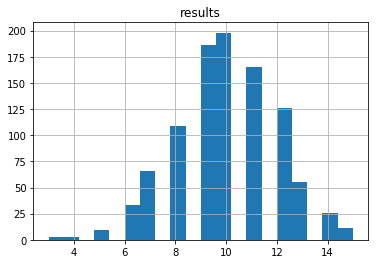

In [13]:
model = MedianFrequencyStrategy(data=df.tail(n_samples), **lotomania_settings)

print('Win results: ', model.win_results())
print('Next choice:', model.pick_numbers())

model.stats()
model.plot_stats()

### Test Picked Matched Last 3 Strategy

Win results:  13/990 (1.3131313131313131 %)
Next choice: [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 97, 98, 99]
          results
count  990.000000
mean     9.821212
std      1.974907
min      4.000000
25%      8.250000
50%     10.000000
75%     11.000000
max     16.000000


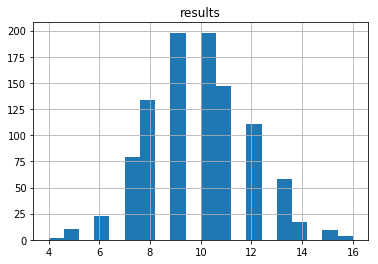

In [14]:
model = PickedMatchedLast3Strategy(data=df.tail(n_samples), **lotomania_settings)

print('Win results: ', model.win_results())
print('Next choice:', model.pick_numbers())

model.stats()
model.plot_stats()

### Mix Simples Strategy

Win results:  13/990 (1.3131313131313131 %)
Next choice: [0, 1, 5, 7, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 67]
          results
count  990.000000
mean    10.011111
std      2.051628
min      3.000000
25%      9.000000
50%     10.000000
75%     11.000000
max     16.000000


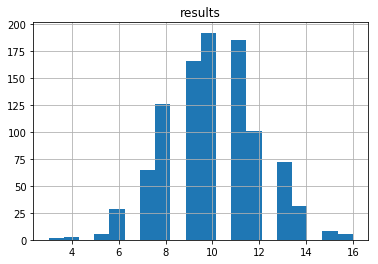

In [15]:
model = MixSimpleStrategy(
    data=df.tail(n_samples), 
    strategies=[
        LowFrequencyStrategy, 
        MedianFrequencyStrategy, 
        PickedMatchedLast3Strategy
    ], **lotomania_settings
)

print('Win results: ', model.win_results())
print('Next choice:', model.pick_numbers())

model.stats()
model.plot_stats()

### Random Strategy

Win results:  11/990 (1.1111111111111112 %)
Next choice: [2, 6, 10, 11, 12, 13, 16, 18, 19, 21, 23, 27, 28, 29, 31, 32, 36, 39, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 56, 57, 59, 63, 64, 65, 68, 69, 70, 72, 74, 77, 82, 84, 85, 88, 89, 90, 93, 95, 97, 98]
          results
count  990.000000
mean     9.939394
std      2.002618
min      4.000000
25%      9.000000
50%     10.000000
75%     11.000000
max     17.000000


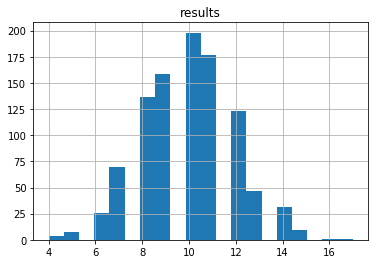

In [16]:
model = RandomStrategy(data=df.tail(n_samples), **lotomania_settings)

print('Win results: ', model.win_results())
print('Next choice:', model.pick_numbers())

model.stats()
model.plot_stats()